<a href="https://colab.research.google.com/github/saheedadey/Quiz-answer/blob/master/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Bank Loan Using Machine Learning
>Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
>>The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [88]:
# Import the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [89]:
# Downloading the Datasets
train_url = 'https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/train_ctrUa4K.csv'
test_url = 'https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/test_lAUu6dG.csv'
train_dataset = pd.read_csv(train_url)
test_dataset = pd.read_csv(test_url)


In [90]:
train_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### In the train dataset there are 12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset.

In [91]:
# Shape of of the dataset(rows and column)
print(train_dataset.shape)
print(test_dataset.shape)

(614, 13)
(367, 12)


In [92]:
# Checking the numbers of people that were granted loan
train_dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#### 422 people were granted loan while 192 were not granted

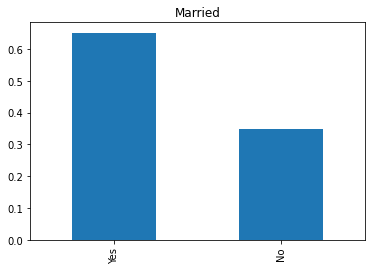

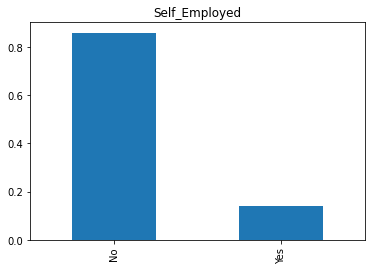

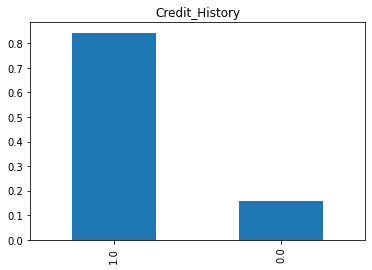

In [93]:
train_dataset['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train_dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train_dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

### Around 65% of the applicants in the dataset are married, around 15% of applicants in the dataset are self-employed and around 85% of applicants have repaid their debts.



### Let us look at some hypothesis for the posisibility of getting loan
> Applicants with high incomes should have more chances of loan approval.

> Applicants who have repaid their previous debts should have higher chances of loan approval.

> Loan approval should also depend on the loan amount. 

>If the loan amount is less, the chances of loan approval should be high.

> Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

Now we will look at the relationship between independent variables and Loan_Status.

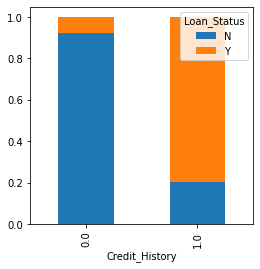

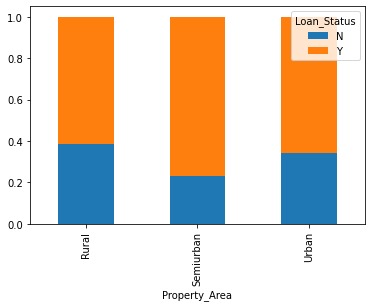

In [94]:
Credit_History=pd.crosstab(train_dataset['Credit_History'],train_dataset['Loan_Status'])
Property_Area=pd.crosstab(train_dataset['Property_Area'],train_dataset['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

People with a credit history as 1 are more likely to get their loans approved, this support one of the hypothesis

The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.



Also, lets look at applicant income and the possibility of getting loan

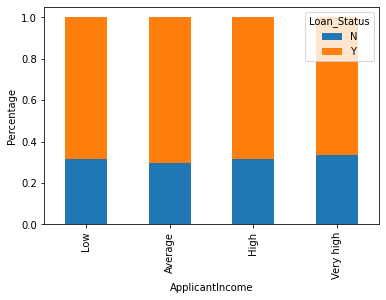

In [95]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_dataset['Income_bin']=pd.cut(train_dataset['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train_dataset['Income_bin'],train_dataset['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

It can be inferred that Applicant's income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant's income is high the chances of loan approval will also be high.

### checking for missing value

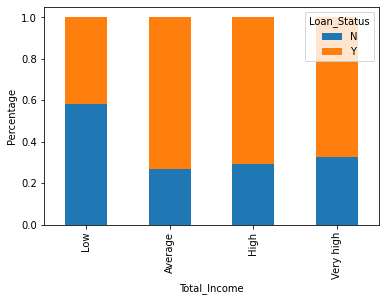

In [96]:
train_dataset['Total_Income']=train_dataset['ApplicantIncome']+train_dataset['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_dataset['Total_Income_bin']=pd.cut(train_dataset['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_dataset['Total_Income_bin'],train_dataset['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

In [97]:
train_dataset=train_dataset.drop(['Income_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train_dataset['Dependents'].replace('3+', 3,inplace=True)
test_dataset['Dependents'].replace('3+', 3,inplace=True)
train_dataset['Loan_Status'].replace('N', 0,inplace=True)
train_dataset['Loan_Status'].replace('Y', 1,inplace=True)

In [98]:
train_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
train_dataset['Gender'].fillna(train_dataset['Gender'].mode()[0], inplace=True)
train_dataset['Married'].fillna(train_dataset['Married'].mode()[0], inplace=True)
train_dataset['Dependents'].fillna(train_dataset['Dependents'].mode()[0], inplace=True)
train_dataset['Self_Employed'].fillna(train_dataset['Self_Employed'].mode()[0], inplace=True)
train_dataset['Credit_History'].fillna(train_dataset['Credit_History'].mode()[0], inplace=True)
train_dataset['Loan_Amount_Term'].fillna(train_dataset['Loan_Amount_Term'].mode()[0], inplace=True)
train_dataset['LoanAmount'].fillna(train_dataset['LoanAmount'].median(), inplace=True)

Lets do the same for the test dataset

In [100]:
test_dataset['Gender'].fillna(train_dataset['Gender'].mode()[0], inplace=True)
test_dataset['Married'].fillna(train_dataset['Married'].mode()[0], inplace=True)
test_dataset['Dependents'].fillna(train_dataset['Dependents'].mode()[0], inplace=True)
test_dataset['Self_Employed'].fillna(train_dataset['Self_Employed'].mode()[0], inplace=True)
test_dataset['Credit_History'].fillna(train_dataset['Credit_History'].mode()[0], inplace=True)
test_dataset['Loan_Amount_Term'].fillna(train_dataset['Loan_Amount_Term'].mode()[0], inplace=True)
test_dataset['LoanAmount'].fillna(train_dataset['LoanAmount'].median(), inplace=True)

In [101]:
test_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Removing Outliers Using Log Transformation

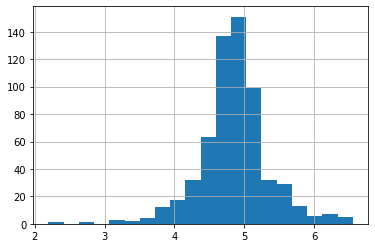

In [102]:
train_dataset['LoanAmount_log']=np.log(train_dataset['LoanAmount'])
train_dataset['LoanAmount_log'].hist(bins=20)
test_dataset['LoanAmount_log']=np.log(test_dataset['LoanAmount'])

In [103]:
train_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


In [104]:
train_dataset=train_dataset.drop('Loan_ID',axis=1)
test_dataset=test_dataset.drop('Loan_ID',axis=1)

In [105]:
X = train_dataset.drop('Loan_Status',1)
y = train_dataset.Loan_Status

In [106]:
X = pd.get_dummies(X)
train_dataset=pd.get_dummies(train_dataset)
test_dataset=pd.get_dummies(test_dataset)

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_dataset_index,test_dataset_index in kf.split(X,y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = X.loc[train_dataset_index],X.loc[test_dataset_index] 
 ytr,yvl = y[train_dataset_index],y[test_dataset_index] 
 model = XGBClassifier(n_estimators=50, max_depth=4) 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xvl) 
 score = accuracy_score(yvl,pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(test_dataset)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.8032786885245902

 Mean Validation Accuracy 0.8029321604691457
